# An RL application: managing the powergrid

During this session we present an application to reinforcement learning in a "real world" scenario.

During this lecture, you will learn the (ultra) basic of powergrid operation (*ie* what some people are doing 24/7 to ensure the rest of the world has access to as much power as possible). 

You will also be able to interact with a powergrid and see how to apply some (state of the art?) algorithm to solve these problems.

**Disclaimer**: This notebook presents the "powergrid problem" in a very simplified version. This "powergrid problem" (as modelized for the l2rpn competitions [Robustness](https://competitions.codalab.org/competitions/25426) and [Adaptability](https://competitions.codalab.org/competitions/25427)) is itself only a small part of what powergrid operators need to do in real time. This notebook does not pretend at all to be exhaustive in the description of all of these problematics.


## Introduction to power system

For this notebook we will use a dedicated environment called "educ_case14_redisp". Grid2op comes with many different environments, with different problems etc. In this notebook, we will only mention and explain this specific environment.

Power system have one major objective: allow the transmission of electricity from the producers to the consumers as effeciently as possible.

This environment is based on the "IEEE case14" grid studied in the litterature.

In [1]:
import numpy as np  # 99% of python scripts (for data science) use this package
import grid2op  # main package
from grid2op.PlotGrid import PlotMatplot  # for representing (plotting) the grid
env = grid2op.make("educ_case14_redisp", test=True)  # creating the environment (compatible with openai gym)

/home/donnotben/Documents/Grid2Op_dev/getting_started/grid2op/MakeEnv/Make.py:266: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


In [2]:
plot_helper = PlotMatplot(env.observation_space)

In [3]:
if False:
    line_values = env.get_thermal_limit()
    line_values[0] = None
    line_values[1] = None
    line_values[2] = None
    line_values[3] = None
    # _ = plot_helper.plot_info(line_values=line_values)
    plot_helper.assign_line_palette(nb_color=10)
    _ = plot_helper.plot_info(line_values=line_values, coloring="line")
    plot_helper.restore_line_palette()

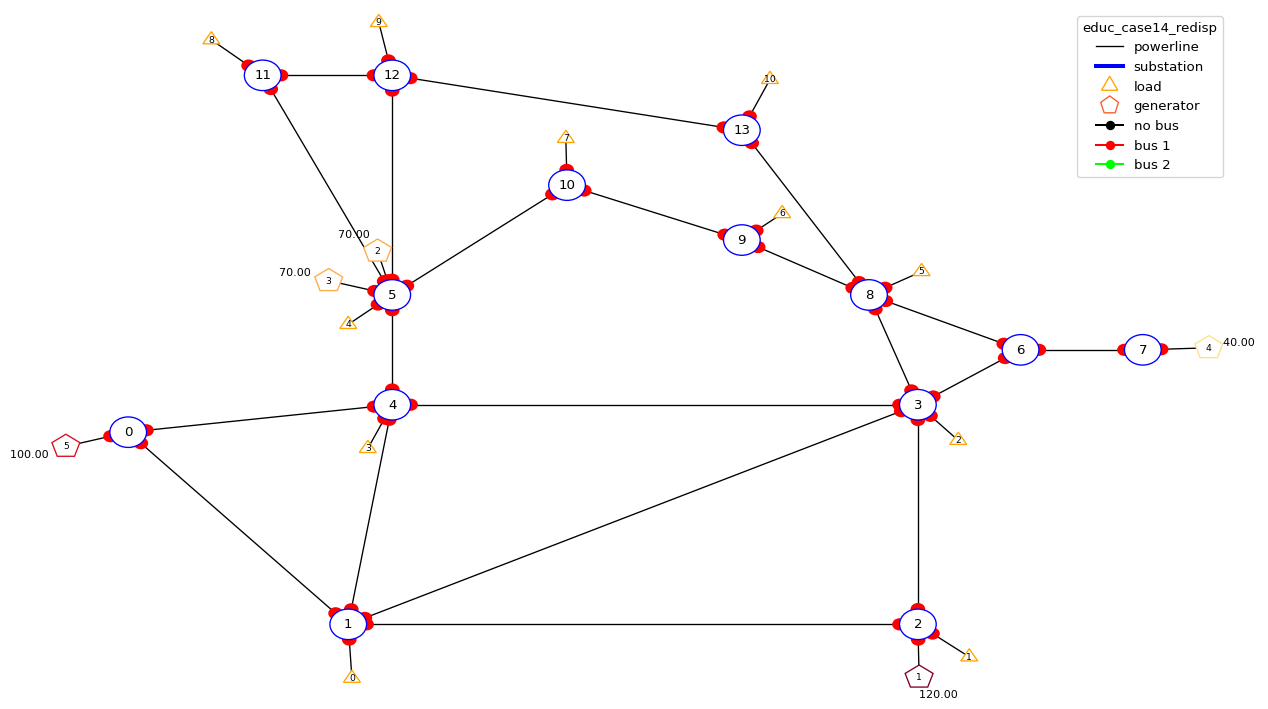

In [4]:
plot_helper.assign_gen_palette(nb_color=5, increase_gen_size=1.5)
vals = [el for el in env.gen_pmax]
vals[0] = None
_ = plot_helper.plot_info(gen_values=vals, coloring="gen")
plot_helper.restore_gen_palette()